# NaiveBayes classifier for Amazon Fine foods reviews dataset.


#### * Our objective here is to build a NaiveBayes model to estimate the polarity of a review as Positive/Negative based on the words used in the review.

 * We are given a 500K datset of reviews from Amazon customers regarding the various food products.
 

 * We will be using 3 types of Vectorizations to convert text reviews into vectors and we will conclude towards the best Vectorizer based on several performance metrics.
 
 
 * We will ignore Word2Vec models since the features won't be conditionally independent, which is the simplest assumption made for Naive Bayes.
 
 

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
con=sqlite3.connect('G:\ML\Data_Sets\Amazon\Cleaned_AmazonDB.sqlite')

In [6]:
data=pd.read_sql_query('''Select * from Reviews''',con)
data.head()

,level_0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,New
0,0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak watch realli rosi movi incorp...
2,2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [10]:
data.shape

(364171, 13)

## Time based sorting of data:

In [7]:
sorted_data=data.sort_values('Time',axis=0,ascending=True)

In [12]:
sorted_data.head()

,level_0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,New
0,0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
30,30,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year child sister ...
424,424,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
330,330,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur star michael keaton...
423,423,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


## Splitting of Test and Train data

In [8]:
train_length=round(0.7*len(data))
print(train_length)
test_length=round(0.3*len(data))
print(test_length)
print((train_length+test_length)==len(data))

254920
109251
True


In [9]:
train=sorted_data.head(train_length)
test=sorted_data.tail(test_length)

## Grid Search CV

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [11]:
def grid_s(x):
    '''
    Program to return optimal values for Hyper Parameter ALPHA.
    '''
    ts_split=TimeSeriesSplit(n_splits=10)
    a=range(1,15)
    par=dict(alpha=a)
    nb=MultinomialNB()
    grid=GridSearchCV(nb,par,cv=ts_split.split(x),scoring='accuracy',verbose=1)
    return grid

## Randomized Search CV

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
def random_s(fold=7):
    '''
    To tune Hyper paramater using Randomized Search CV
    '''
    a=range(1,15)
    par=dict(alpha=a)
    nb=BernoulliNB()
    rand=GridSearchCV(nb,par,cv=fold,scoring='accuracy',verbose=1)
    return rand

# Plotting CV Errors:

In [12]:
def plotter(x):
    '''
    to plot CV errors given a Gridsearch CV Object
    '''
    grid_df=pd.DataFrame(x.cv_results_)
    plt.figure(figsize=(8,4))
    plt.plot(grid_df['param_alpha'],1-grid_df['mean_test_score'])
    plt.xlabel('Alpha -->')
    plt.ylabel('Error -->')
    plt.title('Cross Validation error with respect to alpha') 
    plt.grid()
    plt.show()

## Confusion Matrix:

In [13]:
def CM(x,y):
    '''
    Function to plot confusion matrix
    '''
    CM_Matrix=confusion_matrix(x,y)
    tn,fn,fp,tp=CM_Matrix.ravel()
    print('\n ******************************************************************************* \n')
    
    print(f"TNR value is {tn/(tn+fn)}")
    print(f"FNR value is {fn/(tn+fn)}")
    print(f"FPR value is {fp/(tp+fp)}")
    print(f"TPR value is {tp/(tp+fp)}")
    
    print('\n ******************************************************************************* \n')
    print('Confusion Matrix is :')
    print(CM_Matrix)
    
    print('\n ******************************************************************************* \n')
    precision= tp/(tp+fp)
    print(f'Precision is {precision}')
    recall=tp/(tp+fn)
    print(f'Recall value is {recall}')
    f1=2*((precision*recall)/(precision+recall))
    print(f'F1 Score is {f1}')
    
    print('\n ******************************************************************************* \n')
    print('Heat Map of the Confusion matrix is')
    tmp=pd.DataFrame(CM_Matrix)
    ann=np.array([['True Negative = '+str(tn),'False negative = '+str(fn)],['False Positive = '+str(fp),'True Positive = '+str(tp)]])
    sns.heatmap(tmp,annot=ann,fmt='')
    plt.title('Confusion Matrix : ')
    
    print('\n ******************************************************************************* \n')
    
    

# Bag Of Words Vectorization:

In [12]:
BOW=CountVectorizer()
BOW.fit(train['New'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
BOW_train= BOW.transform(train['New'])
BOW_test=BOW.transform(test['New'])

In [20]:
BOW_train.shape

(254920, 55207)

In [16]:
BOW_grid=grid_s(BOW_train)

In [17]:
BOW_grid.fit(BOW_train,train['Score'])

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  6.9min finished


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x0000026365019678>,
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': range(1, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)

In [18]:
BOW_grid.best_estimator_

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [19]:
BOW_grid.best_score_

0.8954517994303961

### CV Error with different Alpha values:

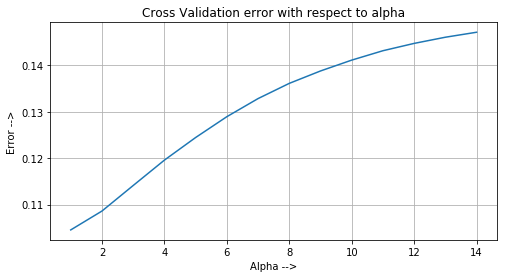

In [64]:
plotter(BOW_grid)

In [39]:
#Random Search
BOW_rand=random_s(5)

In [40]:
BOW_rand.fit(BOW_train,train['Score'])

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': range(1, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)

In [31]:
BOW_grid.best_estimator_

BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [20]:
scaler=StandardScaler(with_mean=False)
std_BOW_train=scaler.fit_transform(BOW_train)
std_BOW_test=scaler.transform(BOW_test)

In [21]:
nb= MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [22]:
nb.fit(std_BOW_train,train['Score'])

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [23]:
pred=nb.predict(std_BOW_test)

In [24]:
acc=accuracy_score(pred,test['Score'])
print(acc*100)

81.00886948403219


## Performace of NB model with BOW:


 ******************************************************************************* 

TNR value is 0.678056705623395
FNR value is 0.321943294376605
FPR value is 0.1619718309859155
TPR value is 0.8380281690140845

 ******************************************************************************* 

Confusion Matrix is :
[[12938  6143]
 [14605 75565]]

 ******************************************************************************* 

Precision is 0.8380281690140845
Recall value is 0.9248176433152201
F1 Score is 0.8792864706361488

 ******************************************************************************* 

Heat Map of the Confusion matrix is

 ******************************************************************************* 



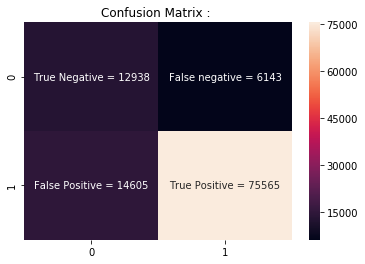

In [70]:
CM(test['Score'],pred)

## Feature Importance:

In [71]:
feats= nb.feature_log_prob_

In [79]:
Positive_words_indices=feats[0].argsort()[::-1]
Negative_words_indices=feats[1].argsort()[::-1]

In [83]:
#Top 20 features from +ve and -ve words.
neg=np.take(BOW.get_feature_names(), Positive_words_indices[:20])
pos=np.take(BOW.get_feature_names(), Negative_words_indices[:20])

In [84]:
print(f'Top 20 positive features are : \n\n {pos}')

Top 20 positive features are : 

 ['love' 'great' 'good' 'like' 'tast' 'one' 'tri' 'use' 'make' 'flavor'
 'get' 'best' 'product' 'find' 'buy' 'time' 'realli' 'much' 'littl'
 'price']


In [85]:
print(f'Top 20 negative features are : \n\n {neg}')

Top 20 negative features are : 

 ['tast' 'like' 'product' 'disappoint' 'would' 'one' 'buy' 'tri' 'bad'
 'money' 'even' 'not' 'order' 'wast' 'return' 'thought' 'bought' 'get'
 'flavor' 'look']


# BOW - Bi-gram Vectorization:

In [14]:
BOW1=CountVectorizer(ngram_range=(1,2))
BOW1.fit(train['New'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
BOW1_train= BOW1.transform(train['New'])
BOW1_test=BOW1.transform(test['New'])

In [16]:
BOW1_train.shape

(254920, 2184164)

In [19]:
BOW1_grid=grid_s(BOW1_train[:100000])

In [20]:
BOW1_grid.fit(BOW1_train[0:100000],train['Score'][:100000])

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  4.2min finished


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x000001B7BB96DF68>,
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': range(1, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)

In [21]:
BOW1_grid.best_estimator_

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [22]:
BOW1_grid.best_score_

0.8778327832783278

### CV Error with different Alpha values:

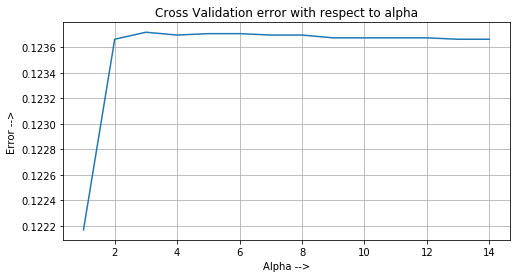

In [29]:
plotter(BOW1_grid)

In [23]:
scaler=StandardScaler(with_mean=False)
std_BOW1_train=scaler.fit_transform(BOW1_train)
std_BOW1_test=scaler.transform(BOW1_test)

In [24]:
nb= MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [25]:
nb.fit(std_BOW1_train,train['Score'])

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [26]:
pred1=nb.predict(std_BOW1_test)

In [27]:
acc=accuracy_score(pred1,test['Score'])
print(acc*100)

83.52143229810254


## Performace of NB model with BOW_Bigram:


 ******************************************************************************* 

TNR value is 0.3275509669304544
FNR value is 0.6724490330695456
FPR value is 0.05735832316735056
TPR value is 0.9426416768326494

 ******************************************************************************* 

Confusion Matrix is :
[[ 6250 12831]
 [ 5172 84998]]

 ******************************************************************************* 

Precision is 0.9426416768326494
Recall value is 0.8688425722434043
F1 Score is 0.904238852334321

 ******************************************************************************* 

Heat Map of the Confusion matrix is

 ******************************************************************************* 



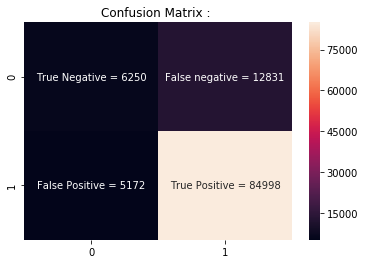

In [28]:
CM(test['Score'],pred1)

## Feature Importance:

In [30]:
feats= nb.feature_log_prob_

In [31]:
feats.shape

(2, 2184164)

In [37]:
class0_words_indices=feats[0].argsort()[::-1]
class1_words_indices=feats[1].argsort()[::-1]

In [41]:
#Top 20 features from +ve and -ve words
neg=np.take(BOW1.get_feature_names(), class0_words_indices[:20])
pos=np.take(BOW1.get_feature_names(), class1_words_indices[:20])

In [42]:
print(f'Top 20 positive features are :\n\n {pos}')

Top 20 positive features are :

 ['love' 'great' 'good' 'like' 'tast' 'one' 'tri' 'use' 'make' 'flavor'
 'get' 'best' 'product' 'find' 'buy' 'time' 'realli' 'much' 'littl'
 'price']


In [43]:
print(f'Top 20 negative features are : \n\n {neg}')

Top 20 negative features are : 

 ['tast' 'like' 'product' 'disappoint' 'would' 'one' 'buy' 'tri' 'bad'
 'money' 'even' 'not' 'order' 'wast' 'return' 'thought' 'wast money'
 'tast like' 'bought' 'get']


# TF-IDF Vectorization:

In [44]:
tfidf=TfidfVectorizer()
tfidf.fit(train['New'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [45]:
tfidf_train= tfidf.transform(train['New'])
tfidf_test= tfidf.transform(test['New'])

In [46]:
tfidf_train.shape

(254920, 55207)

In [47]:
tfidf_grid=grid_s(tfidf_train)

In [48]:
tfidf_grid.fit(tfidf_train,train['Score'])

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  6.8min finished


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x000001B7B42AD5C8>,
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': range(1, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)

In [49]:
tfidf_grid.best_estimator_

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [50]:
tfidf_grid.best_score_

0.8511262621903858

### CV Error with different Alpha values:

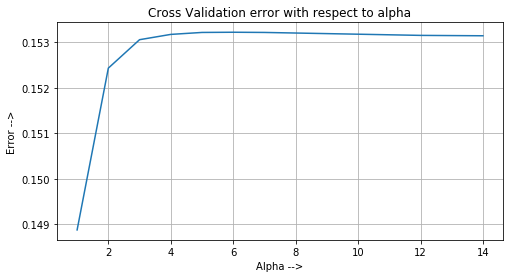

In [66]:
plotter(tfidf_grid)

In [51]:
std_train_tfidf=scaler.fit_transform(tfidf_train)
std_test_tfidf=scaler.transform(tfidf_test)

In [52]:
tfidf_nb=MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [53]:
tfidf_nb.fit(std_train_tfidf,train['Score'])

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [54]:
tfidf_pred= tfidf_nb.predict(std_test_tfidf)

In [55]:
tfidf_acc=accuracy_score(tfidf_pred,test['Score'])

In [56]:
print(tfidf_acc * 100)

80.77729265636012


In [57]:
feats2=tfidf_nb.feature_log_prob_

### Feature Importance

In [62]:
Positive_words_indices=feats2[0].argsort()[::-1]
Negative_words_indices=feats2[1].argsort()[::-1]

#Top 20 features from +ve and -ve words.
neg=np.take(tfidf.get_feature_names(), Positive_words_indices[:20])
pos=np.take(tfidf.get_feature_names(), Negative_words_indices[:20])



In [63]:
print(f'Top 20 positive features are :\n\n {pos}')

Top 20 positive features are :

 ['love' 'like' 'great' 'good' 'tast' 'use' 'one' 'flavor' 'tri' 'make'
 'get' 'product' 'best' 'find' 'buy' 'time' 'amazon' 'realli' 'littl'
 'price']


In [64]:
print(f'Top 20 negative features are : \n\n {neg}')

Top 20 negative features are : 

 ['tast' 'like' 'disappoint' 'would' 'product' 'one' 'bad' 'tri' 'wast'
 'return' 'money' 'even' 'buy' 'not' 'flavor' 'thought' 'worst' 'box'
 'review' 'order']


## Performance of NB on TfIdf:


 ******************************************************************************* 

TNR value is 0.6691997274775955
FNR value is 0.33080027252240446
FPR value is 0.1629034046800488
TPR value is 0.8370965953199512

 ******************************************************************************* 

Confusion Matrix is :
[[12769  6312]
 [14689 75481]]

 ******************************************************************************* 

Precision is 0.8370965953199512
Recall value is 0.9228295819935691
F1 Score is 0.8778748916918173

 ******************************************************************************* 

Heat Map of the Confusion matrix is

 ******************************************************************************* 



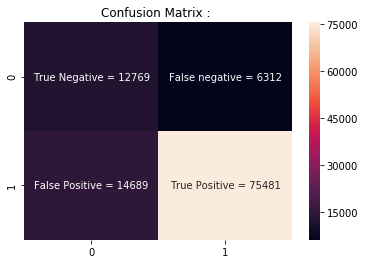

In [65]:
CM(test['Score'],tfidf_pred)

# Performace comparision between different vectorizations::

In [67]:
from prettytable import PrettyTable

In [70]:
table=PrettyTable()

table.field_names=['Type of vector','No of train pts','No of Test pts','No of Dimensions','Optimal_alpha','Accuracy','F1 Score']

table.add_row(['BOW_Unigram',254920,109251,55207,1,81.00,0.879])
table.add_row(['BOW_Bigram',254920,109251,2184164,1,83.52,0.904])
table.add_row(['Tf-Idf',254920,109251,55207,1,80.77,0.877])


In [71]:
print(table)

+----------------+-----------------+----------------+------------------+---------------+----------+----------+
| Type of vector | No of train pts | No of Test pts | No of Dimensions | Optimal_alpha | Accuracy | F1 Score |
+----------------+-----------------+----------------+------------------+---------------+----------+----------+
|  BOW_Unigram   |      254920     |     109251     |      55207       |       1       |   81.0   |  0.879   |
|   BOW_Bigram   |      254920     |     109251     |     2184164      |       1       |  83.52   |  0.904   |
|     Tf-Idf     |      254920     |     109251     |      55207       |       1       |  80.77   |  0.877   |
+----------------+-----------------+----------------+------------------+---------------+----------+----------+


# Conclusion from above exercise:

1.) The accuracy and F1 score is high in BOW_bigram followed by BOW_Unigram and TfIdf vectorizations.

2.) The BOW with bigrams though it produces high dimesional Vectors, it gives us a best accuracy.

*****************************************************************************************************************************

### From above exercise it is clear that BOW with Bigram can be implemented with NaiveBayes model to get better performance along with less latency and simplicity of code.

